Guidelines mentioned the problem statement                                https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/#features_eg

1. Target variable: total_cases

2. ePerformance is evaluated according to the mean absolute error mentioned above

3. The format for the submission file is simply the (city, year, weekofyear) and the predicted total_cases for San Juan or Iquitos

Other Links refered

https://dengueforecasting.noaa.gov/

https://drivendata.co/blog/dengue-benchmark/




In [1]:
## importing Libraries for running Jupyter Notebook in Google Cloud
## and for storing data downloaded for the Dengue compettion

import os
from os import mkdir
from google.colab import drive
drive.mount('/content/gdrive')

print(os.getcwd())

# Creating a new directory
path = "/content/gdrive/MyDrive/dengue_analysis"
#os.mkdir(path)

Mounted at /content/gdrive
/content


In [2]:
pwd

'/content'

In [3]:
cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [4]:
pwd

'/content/gdrive/MyDrive'

In [5]:
cd dengue_analysis/

/content/gdrive/MyDrive/dengue_analysis


In [6]:
ls

 backup_data/
 Iquitos_Population_Data.csv
 Iquitos_Training_population_station_satellite_Reanalysis_sub.csv
 NDVI_iquitos.csv
 NDVI_sanJuan.csv
 RanalysisTemp.csv
 ReanalysisHumidity.csv
 Reanalysis_Iquitos.csv
 Reanalysis_SanJuan.csv
 San_Juan_Population_Data.csv
 San_Juan_Training_Data.csv
 San_Juan_Training_population_station_satellite_Reanalysis_sub.csv
 SatellitePrecip.csv
 SatellitePrecip_Iquitos.csv
 SatellitePrecip_SanJuan.csv
'StationData_Iquitos).csv'
 StationData_Iquitos.csv
 StationData_Iquitos_Training_Data.csv
 StationData_SanJuan.csv
 temp.csv
 temp.xls


In [7]:
## 1. Importing libraries

%matplotlib inline

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from warnings import filterwarnings
filterwarnings('ignore')


##
import urllib.request
import urllib.error

import requests

import csv

import datetime
from datetime import date, timedelta

from __future__ import print_function
from __future__ import division

# import wget


In [8]:
## 2. Making functions

def get_files(url, filename):

    #url = url

    request_data = requests.get(url)

    open('temp.csv', 'wb').write(request_data.content)

    df = pd.read_csv('temp.csv')

    print('dataframe shape')

    print(df.shape)

    print('dataframe columns')

    print(df.columns)

    print('dataframe rows details')

    print(df.info())

    print('dataframe data')

    print(df.head())

    print('dataframe data overview')

    print(df.describe())

    df.to_csv((f"{filename}.csv"))

    return df


In [9]:
def get_excel_files(url, filename):

  #df = pd.read_csv(url)

  ##url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?id=CHXRSA'

  # url = url

  request_data = requests.get(url)

  open('temp.xls', 'wb').write(request_data.content)

  df = pd.read_excel('temp.xls')

  print('dataframe shape')

  print(df.shape)

  print('dataframe columns')

  print(df.columns)

  print('dataframe rows details')

  print(df.info())

  print('dataframe data')

  print(df.head())

  print('dataframe data overview')

  print(df.describe())

  #destination_filename = file_name+.+csv

  df.to_csv((f"{filename}.csv"))

  return df

In [10]:
def row_to_head(df_1):

  df_1.columns = df_1.iloc[0]

  df_1 = df_1.iloc[1:]

  #print(df_1.shape)

  print(df_1.head())

  return df_1

In [11]:
def change_1(df, column):

  df[column] = pd.to_datetime(df[column])
  df['year']= df[column].dt.year
  df['month']= df[column].dt.month
  df['day']= df[column].dt.day

  return  (df['year'], df['month'], df['day'])

In [12]:
def change_1(df, column):

  df[column] = pd.to_datetime(df[column])
  df['year']= df[column].dt.year
  df['month']= df[column].dt.month
  df['day']= df[column].dt.day

  return  (df['year'], df['month'], df['day'])

3. Data Gathering from various sources mentioned the weblink

In [13]:
## 1 Training data

San_Juan_Training_Data_url = "https://dengueforecasting.noaa.gov/Training/San_Juan_Training_Data.csv"

Iquitos_Training_Data_url = 'https://dengueforecasting.noaa.gov/Training/Iquitos_Training_Data.csv'

In [14]:
San_Juan_Training_Data = get_files(San_Juan_Training_Data_url, 'San_Juan_Training_Data') ##1

#Iquitos_Training_Data = get_files(Iquitos_Training_Data_url, 'StationData_Iquitos_Training_Data')  ##1a

dataframe shape
(988, 10)
dataframe columns
Index(['season', 'season_week', 'week_start_date', 'denv1_cases',
       'denv2_cases', 'denv3_cases', 'denv4_cases', 'other_positive_cases',
       'additional_cases', 'total_cases'],
      dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   season                988 non-null    object
 1   season_week           988 non-null    int64 
 2   week_start_date       988 non-null    object
 3   denv1_cases           988 non-null    int64 
 4   denv2_cases           988 non-null    int64 
 5   denv3_cases           988 non-null    int64 
 6   denv4_cases           988 non-null    int64 
 7   other_positive_cases  988 non-null    int64 
 8   additional_cases      988 non-null    int64 
 9   total_cases           988 non-null    int64 
dtypes: int64(8), obj

In [15]:
San_Juan_Training_Data.season.value_counts().head()  ## column can be deleted, not useful

1990/1991    52
2000/2001    52
2007/2008    52
2006/2007    52
2005/2006    52
Name: season, dtype: int64

In [16]:
Iquitos_Training_Data = get_files(Iquitos_Training_Data_url, 'StationData_Iquitos_Training_Data')  ##1a

dataframe shape
(468, 9)
dataframe columns
Index(['season', 'season_week', 'week_start_date', 'denv1_cases',
       'denv2_cases', 'denv3_cases', 'denv4_cases', 'other_positive_cases',
       'total_cases'],
      dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   season                468 non-null    object
 1   season_week           468 non-null    int64 
 2   week_start_date       468 non-null    object
 3   denv1_cases           468 non-null    int64 
 4   denv2_cases           468 non-null    int64 
 5   denv3_cases           468 non-null    int64 
 6   denv4_cases           468 non-null    int64 
 7   other_positive_cases  468 non-null    int64 
 8   total_cases           468 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 33.0+ KB
None
dataframe data
      season  season_w

San Juan Data

In [17]:
San_Juan_Training_Data

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6
...,...,...,...,...,...,...,...,...,...,...
983,2008/2009,48,2009-03-26,11,0,0,0,13,0,24
984,2008/2009,49,2009-04-02,4,0,0,1,4,0,9
985,2008/2009,50,2009-04-09,13,0,0,1,7,0,21
986,2008/2009,51,2009-04-16,7,0,0,0,3,0,10


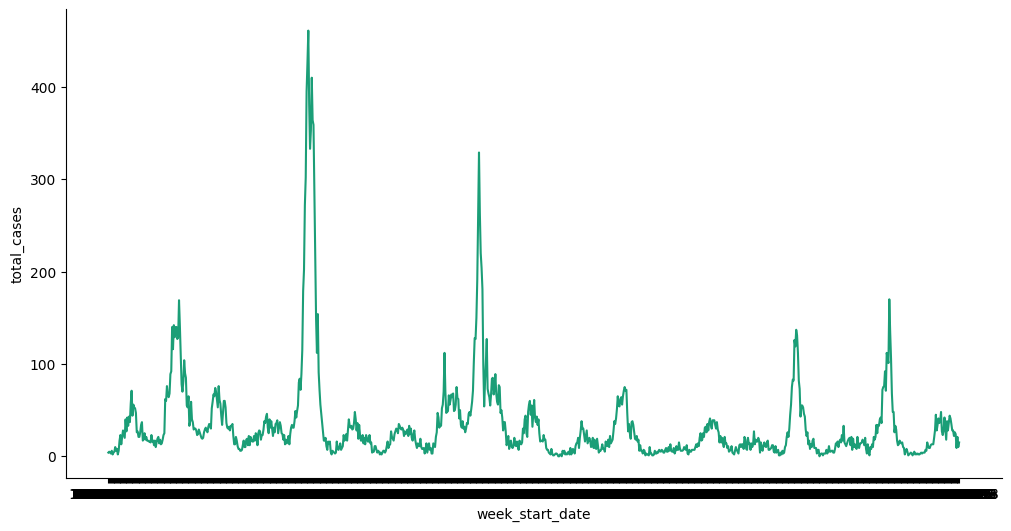

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['week_start_date']
  ys = series['total_cases']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = San_Juan_Training_Data.sort_values('week_start_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('week_start_date')
_ = plt.ylabel('total_cases')

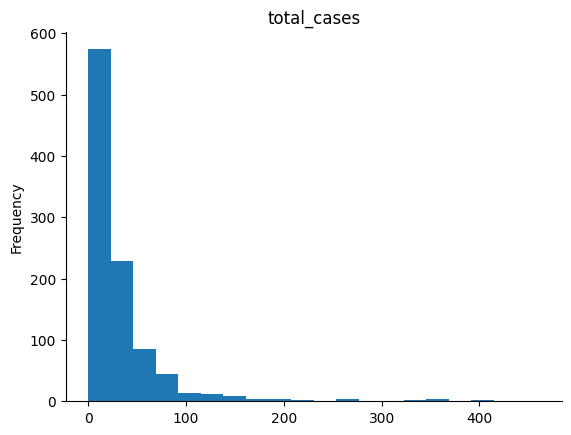

In [19]:
from matplotlib import pyplot as plt
San_Juan_Training_Data['total_cases'].plot(kind='hist', bins=20, title='total_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

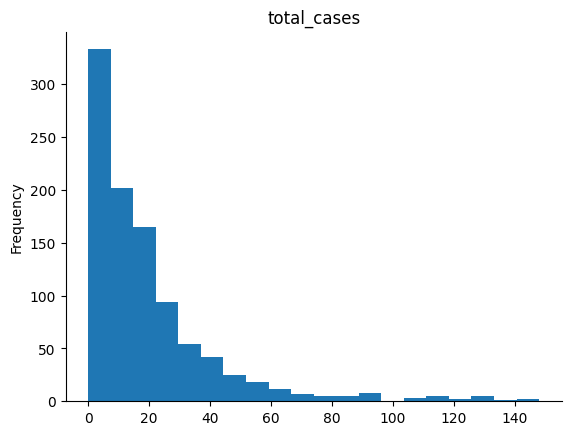

In [20]:
from matplotlib import pyplot as plt
San_Juan_Training_Data['other_positive_cases'].plot(kind='hist', bins=20, title='total_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

Iquitos_Training_Data

In [21]:
Iquitos_Training_Data

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases
0,2000/2001,1,2000-07-01,0,0,0,0,0,0
1,2000/2001,2,2000-07-08,0,0,0,0,0,0
2,2000/2001,3,2000-07-15,0,0,0,0,0,0
3,2000/2001,4,2000-07-22,0,0,0,0,0,0
4,2000/2001,5,2000-07-29,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
463,2008/2009,48,2009-05-28,0,0,0,1,1,2
464,2008/2009,49,2009-06-04,0,0,0,1,2,3
465,2008/2009,50,2009-06-11,0,0,0,2,1,3
466,2008/2009,51,2009-06-18,0,0,0,3,2,5


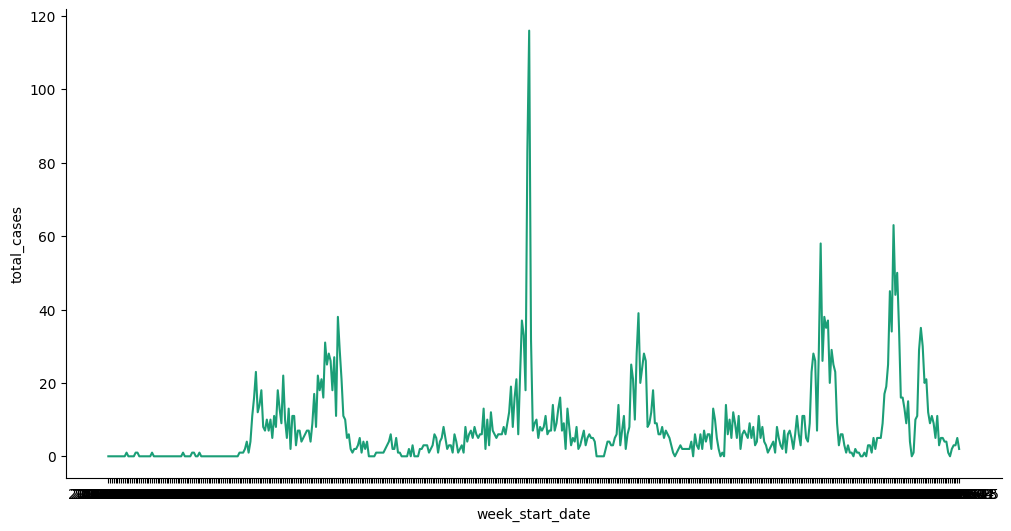

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['week_start_date']
  ys = series['total_cases']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = Iquitos_Training_Data.sort_values('week_start_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('week_start_date')
_ = plt.ylabel('total_cases')

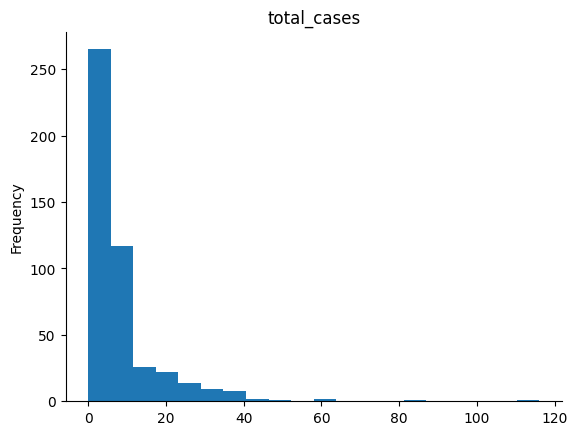

In [23]:
from matplotlib import pyplot as plt
Iquitos_Training_Data['total_cases'].plot(kind='hist', bins=20, title='total_cases')
plt.gca().spines[['top', 'right',]].set_visible(False)

Converting data to Time Series data indexed by week_start_date for Data exploration later

In [24]:
(Iquitos_Training_Data['year'], Iquitos_Training_Data['month'], Iquitos_Training_Data['day']) = change_1(Iquitos_Training_Data, 'week_start_date')


Iquitos_Training_Data.head()

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases,year,month,day
0,2000/2001,1,2000-07-01,0,0,0,0,0,0,2000,7,1
1,2000/2001,2,2000-07-08,0,0,0,0,0,0,2000,7,8
2,2000/2001,3,2000-07-15,0,0,0,0,0,0,2000,7,15
3,2000/2001,4,2000-07-22,0,0,0,0,0,0,2000,7,22
4,2000/2001,5,2000-07-29,0,0,0,0,0,0,2000,7,29


In [25]:
(San_Juan_Training_Data['year'], San_Juan_Training_Data['month'], San_Juan_Training_Data['day']) = change_1(San_Juan_Training_Data, 'week_start_date')

San_Juan_Training_Data.head()

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases,year,month,day
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4,1990,4,30
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5,1990,5,7
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4,1990,5,14
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3,1990,5,21
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6,1990,5,28


In [26]:
## 2 Population Data

Iquitos_Population_Data_url = "https://dengueforecasting.noaa.gov/PopulationData/Iquitos_Population_Data.csv"

San_Juan_Population_Data_url = "https://dengueforecasting.noaa.gov/PopulationData/San_Juan_Population_Data.csv"


In [27]:
San_Juan_Population_Data = get_files(San_Juan_Population_Data_url, 'San_Juan_Population_Data')  ##1a

dataframe shape
(17, 2)
dataframe columns
Index(['Year', 'Estimated_population'], dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  17 non-null     int64
 1   Estimated_population  17 non-null     int64
dtypes: int64(2)
memory usage: 400.0 bytes
None
dataframe data
   Year  Estimated_population
0  1990               2217968
1  1999               2453157
2  2000               2389397
3  2001               2395941
4  2002               2400500
dataframe data overview
              Year  Estimated_population
count    17.000000          1.700000e+01
mean   2005.529412          2.356744e+06
std       6.104482          6.446712e+04
min    1990.000000          2.217968e+06
25%    2002.000000          2.327325e+06
50%    2006.000000          2.382377e+06
75%    2010.000000         

In [28]:
San_Juan_Population_Data.Year.value_counts().head()

1990    1
2007    1
2013    1
2012    1
2011    1
Name: Year, dtype: int64

In [29]:
Iquitos_Population_Data = get_files(Iquitos_Population_Data_url, 'Iquitos_Population_Data') ##1

dataframe shape
(15, 2)
dataframe columns
Index(['Year', 'Estimated_population'], dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  15 non-null     int64
 1   Estimated_population  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes
None
dataframe data
   Year  Estimated_population
0  2000                386666
1  2001                393355
2  2002                399770
3  2003                405988
4  2004                412095
dataframe data overview
              Year  Estimated_population
count    15.000000             15.000000
mean   2007.000000         429136.400000
std       4.472136          25986.764598
min    2000.000000         386666.000000
25%    2003.500000         409041.500000
50%    2007.000000         430268.000000
75%    2010.500000         

In [30]:
Iquitos_Population_Data.Year.value_counts().head()

2000    1
2001    1
2002    1
2003    1
2004    1
Name: Year, dtype: int64

In [31]:
# ETL Making join between Training Data and Population Data for the two cities

San_Juan_Training_population = pd.merge(San_Juan_Training_Data, San_Juan_Population_Data,  how='left', left_on=['year'], right_on = ['Year'])

San_Juan_Training_population.head()

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases,year,month,day,Year,Estimated_population
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4,1990,4,30,1990.0,2217968.0
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5,1990,5,7,1990.0,2217968.0
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4,1990,5,14,1990.0,2217968.0
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3,1990,5,21,1990.0,2217968.0
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6,1990,5,28,1990.0,2217968.0


In [32]:
San_Juan_Training_population['Estimated_population'].isnull().value_counts()

False    572
True     416
Name: Estimated_population, dtype: int64

In [33]:
print(San_Juan_Training_Data.shape)

print(San_Juan_Training_population.shape)

(988, 13)
(988, 15)


In [34]:
Iquitos_Training_population = pd.merge(Iquitos_Training_Data, Iquitos_Population_Data,  how='left', left_on=['year'], right_on = ['Year'])

Iquitos_Training_population.head()

,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases,year,month,day,Year,Estimated_population
0,2000/2001,1,2000-07-01,0,0,0,0,0,0,2000,7,1,2000,386666
1,2000/2001,2,2000-07-08,0,0,0,0,0,0,2000,7,8,2000,386666
2,2000/2001,3,2000-07-15,0,0,0,0,0,0,2000,7,15,2000,386666
3,2000/2001,4,2000-07-22,0,0,0,0,0,0,2000,7,22,2000,386666
4,2000/2001,5,2000-07-29,0,0,0,0,0,0,2000,7,29,2000,386666


In [35]:
print(Iquitos_Training_Data.shape)

print(Iquitos_Training_population.shape)

(468, 12)
(468, 14)


In [36]:
## 3 Station Data

StationData_Iquitos_url = "https://dengueforecasting.noaa.gov/StationData/IquitosPE000084377.csv"

StationData_SanJuan_url = "https://dengueforecasting.noaa.gov/StationData/SanJuanRQW00011641.csv"

## StationData_Iquitos = get_files(StationData_Iquitos_url, 'StationData_Iquitos')##1

## StationData_SanJuan = get_files(StationData_SanJuan_url, 'StationData_SanJuan')  ##1a



In [37]:
StationData_Iquitos = get_files(StationData_Iquitos_url, 'StationData_Iquitos')##1

dataframe shape
(14554, 8)
dataframe columns
Index(['YYYY', 'MM', 'DD', 'TMAX', 'TMIN', 'TAVG', 'TDTR', 'PRCP'], dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14554 entries, 0 to 14553
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYY    14554 non-null  int64  
 1   MM      14554 non-null  int64  
 2   DD      14554 non-null  int64  
 3   TMAX    14554 non-null  float64
 4   TMIN    14554 non-null  float64
 5   TAVG    14554 non-null  float64
 6   TDTR    14554 non-null  float64
 7   PRCP    14554 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 909.8 KB
None
dataframe data
   YYYY  MM  DD    TMAX  TMIN    TAVG    TDTR  PRCP
0  1973   1   2 -9999.0  24.0 -9999.0 -9999.0   0.0
1  1973   1   3 -9999.0  23.0 -9999.0 -9999.0  14.0
2  1973   1   4 -9999.0  23.0 -9999.0 -9999.0  30.0
3  1973   1   5    31.0  23.0    27.0     8.0  10.9
4  1973   1   6 -9999.0  23.0 -9999.0 

In [38]:
StationData_Iquitos

,YYYY,MM,DD,TMAX,TMIN,TAVG,TDTR,PRCP
0,1973,1,2,-9999.0,24.0,-9999.0,-9999.0,0.0
1,1973,1,3,-9999.0,23.0,-9999.0,-9999.0,14.0
2,1973,1,4,-9999.0,23.0,-9999.0,-9999.0,30.0
3,1973,1,5,31.0,23.0,27.0,8.0,10.9
4,1973,1,6,-9999.0,23.0,-9999.0,-9999.0,0.5
...,...,...,...,...,...,...,...,...
14549,2015,3,10,-9999.0,23.5,-9999.0,-9999.0,29.0
14550,2015,3,11,33.3,22.0,27.6,11.3,45.0
14551,2015,3,12,30.2,-9999.0,-9999.0,-9999.0,0.0
14552,2015,3,13,-9999.0,23.6,-9999.0,-9999.0,3.0


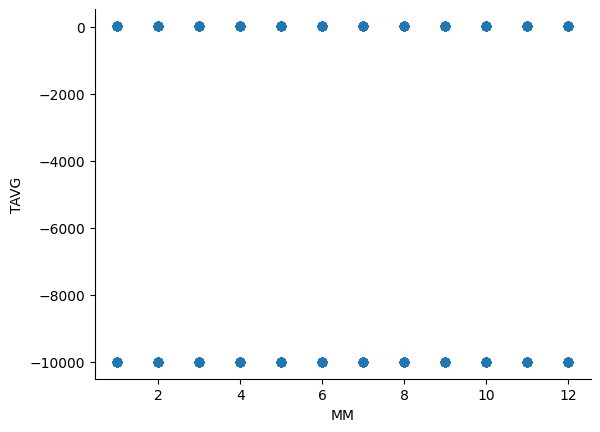

In [39]:
from matplotlib import pyplot as plt
StationData_Iquitos.plot(kind='scatter', x='MM', y='TAVG', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

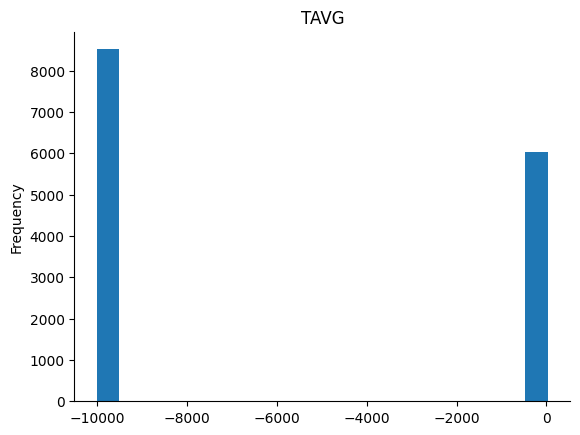

In [40]:
from matplotlib import pyplot as plt
StationData_Iquitos['TAVG'].plot(kind='hist', bins=20, title='TAVG')
plt.gca().spines[['top', 'right',]].set_visible(False)

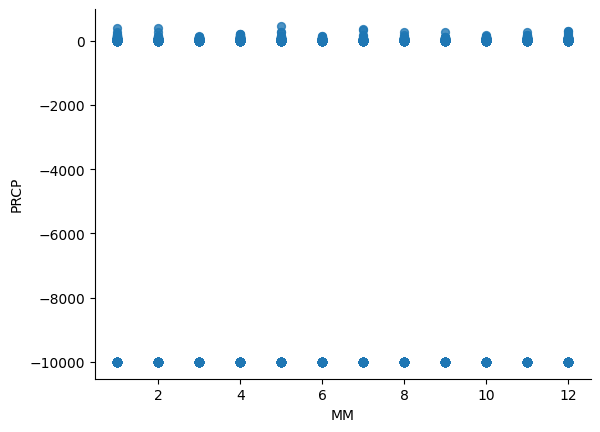

In [41]:
from matplotlib import pyplot as plt
StationData_Iquitos.plot(kind='scatter', x='MM', y='PRCP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
StationData_SanJuan = get_files(StationData_SanJuan_url, 'StationData_SanJuan')  ##1a


dataframe shape
(21623, 8)
dataframe columns
Index(['YYYY', 'MM', 'DD', 'TMAX', 'TMIN', 'TAVG', 'TDTR', 'PRCP'], dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21623 entries, 0 to 21622
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YYYY    21623 non-null  int64  
 1   MM      21623 non-null  int64  
 2   DD      21623 non-null  int64  
 3   TMAX    21623 non-null  float64
 4   TMIN    21623 non-null  float64
 5   TAVG    21623 non-null  float64
 6   TDTR    21623 non-null  float64
 7   PRCP    21623 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.3 MB
None
dataframe data
   YYYY  MM  DD  TMAX  TMIN  TAVG  TDTR  PRCP
0  1956   1   1  26.7  20.6  23.7   6.1   1.3
1  1956   1   2  25.6  21.1  23.4   4.5  20.8
2  1956   1   3  26.7  21.7  24.2   5.0   1.8
3  1956   1   4  26.7  19.4  23.0   7.3   0.0
4  1956   1   5  27.8  17.2  22.5  10.6   0.0
dataframe data overview


In [43]:
StationData_SanJuan

,YYYY,MM,DD,TMAX,TMIN,TAVG,TDTR,PRCP
0,1956,1,1,26.7,20.6,23.7,6.1,1.3
1,1956,1,2,25.6,21.1,23.4,4.5,20.8
2,1956,1,3,26.7,21.7,24.2,5.0,1.8
3,1956,1,4,26.7,19.4,23.0,7.3,0.0
4,1956,1,5,27.8,17.2,22.5,10.6,0.0
...,...,...,...,...,...,...,...,...
21618,2015,3,10,28.9,23.3,26.1,5.6,0.5
21619,2015,3,11,27.8,22.8,25.3,5.0,5.3
21620,2015,3,12,28.3,22.8,25.5,5.5,0.5
21621,2015,3,13,27.8,22.2,25.0,5.6,1.3


In [44]:
## Joining Station Data with above joined data for two cities

In [45]:
San_Juan_Training_population_station = pd.merge(San_Juan_Training_population, StationData_SanJuan,  how='left', left_on=['year','month', 'day'], right_on = ['YYYY','MM', 'DD'])

In [46]:
print(San_Juan_Training_population_station.shape)

print(San_Juan_Training_population.shape)

San_Juan_Training_population_station.head()

(988, 23)
(988, 15)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases,...,Year,Estimated_population,YYYY,MM,DD,TMAX,TMIN,TAVG,TDTR,PRCP
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4,...,1990.0,2217968.0,1990,4,30,29.4,22.2,25.8,7.2,0.0
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5,...,1990.0,2217968.0,1990,5,7,31.7,23.9,27.8,7.8,0.0
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4,...,1990.0,2217968.0,1990,5,14,29.4,22.8,26.1,6.6,4.1
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3,...,1990.0,2217968.0,1990,5,21,33.3,24.4,28.8,8.9,0.0
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6,...,1990.0,2217968.0,1990,5,28,33.9,25.0,29.5,8.9,0.0


In [47]:
Iquitos_Training_population_station = pd.merge(Iquitos_Training_population, StationData_Iquitos,  how='left', left_on=['year','month', 'day'], right_on = ['YYYY','MM', 'DD'])

print(Iquitos_Training_population_station.shape)

print(Iquitos_Training_population.shape)

Iquitos_Training_population_station.head()

(468, 22)
(468, 14)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases,year,...,Year,Estimated_population,YYYY,MM,DD,TMAX,TMIN,TAVG,TDTR,PRCP
0,2000/2001,1,2000-07-01,0,0,0,0,0,0,2000,...,2000,386666,2000.0,7.0,1.0,34.0,-9999.0,-9999.0,-9999.0,-9999.0
1,2000/2001,2,2000-07-08,0,0,0,0,0,0,2000,...,2000,386666,2000.0,7.0,8.0,32.0,21.2,26.6,10.8,0.0
2,2000/2001,3,2000-07-15,0,0,0,0,0,0,2000,...,2000,386666,2000.0,7.0,15.0,-9999.0,14.7,-9999.0,-9999.0,-9999.0
3,2000/2001,4,2000-07-22,0,0,0,0,0,0,2000,...,2000,386666,2000.0,7.0,22.0,-9999.0,-9999.0,-9999.0,-9999.0,1.0
4,2000/2001,5,2000-07-29,0,0,0,0,0,0,2000,...,2000,386666,2000.0,7.0,29.0,31.0,21.5,26.2,9.5,-9999.0


In [48]:
## 4 Satellite

SatellitePrecip_Iquitos_url = "https://dengueforecasting.noaa.gov/SatellitePrecip/Iquitos_Precip.xlsx"

SatellitePrecip_SanJuan_url = "https://dengueforecasting.noaa.gov/SatellitePrecip/SanJuan_Precip.xlsx"


In [49]:
SatellitePrecip_Iquitos = get_excel_files(SatellitePrecip_Iquitos_url, 'SatellitePrecip_Iquitos') #2

dataframe shape
(11409, 4)
dataframe columns
Index(['iquitos_persiann', ' 3.875S', ' 73.375W', ' precipitation_amount'], dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11409 entries, 0 to 11408
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   iquitos_persiann       11409 non-null  object
 1    3.875S                11409 non-null  object
 2    73.375W               11409 non-null  object
 3    precipitation_amount  11409 non-null  object
dtypes: object(4)
memory usage: 356.7+ KB
None
dataframe data
  iquitos_persiann  3.875S  73.375W  precipitation_amount
0             Year   Month      Day                    mm
1             1983       1        1                 10.04
2             1983       1        2                  6.28
3             1983       1        3                  0.94
4             1983       1        4                 14.71
dataframe data o

In [50]:
SatellitePrecip_Iquitos.head()

,iquitos_persiann,3.875S,73.375W,precipitation_amount
0,Year,Month,Day,mm
1,1983,1,1,10.04
2,1983,1,2,6.28
3,1983,1,3,0.94
4,1983,1,4,14.71


In [51]:
SatellitePrecip_Iquitos_upd = row_to_head(SatellitePrecip_Iquitos)

0  Year  Month  Day     mm
1  1983      1    1  10.04
2  1983      1    2   6.28
3  1983      1    3   0.94
4  1983      1    4  14.71
5  1983      1    5  41.97


In [52]:
SatellitePrecip_Iquitos_upd.columns = ['Year', ' Month', ' Day', 'precipitation_amount']

In [53]:
SatellitePrecip_Iquitos_upd.head()

,Year,Month,Day,precipitation_amount
1,1983,1,1,10.04
2,1983,1,2,6.28
3,1983,1,3,0.94
4,1983,1,4,14.71
5,1983,1,5,41.97


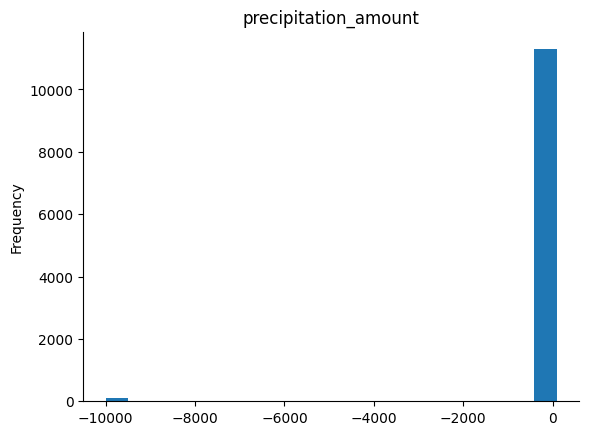

In [54]:
from matplotlib import pyplot as plt
SatellitePrecip_Iquitos_upd['precipitation_amount'].plot(kind='hist', bins=20, title='precipitation_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [55]:
SatellitePrecip_SanJuan = get_excel_files(SatellitePrecip_SanJuan_url, 'SatellitePrecip_SanJuan') #2a

dataframe shape
(11409, 4)
dataframe columns
Index(['san_juan_persiann', ' 18.375N', ' 66.125W', ' precipitation_amount'], dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11409 entries, 0 to 11408
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   san_juan_persiann      11409 non-null  object
 1    18.375N               11409 non-null  object
 2    66.125W               11409 non-null  object
 3    precipitation_amount  11409 non-null  object
dtypes: object(4)
memory usage: 356.7+ KB
None
dataframe data
  san_juan_persiann  18.375N  66.125W  precipitation_amount
0              Year    Month      Day                    mm
1              1983        1        1                     0
2              1983        1        2                     0
3              1983        1        3                     0
4              1983        1        4                     0
da

In [56]:
SatellitePrecip_SanJuan_upd = row_to_head(SatellitePrecip_SanJuan)

SatellitePrecip_SanJuan_upd.head()

0  Year  Month  Day  mm
1  1983      1    1   0
2  1983      1    2   0
3  1983      1    3   0
4  1983      1    4   0
5  1983      1    5   0


,Year,Month,Day,mm
1,1983,1,1,0
2,1983,1,2,0
3,1983,1,3,0
4,1983,1,4,0
5,1983,1,5,0


In [57]:
SatellitePrecip_SanJuan_upd.columns = ['Year', ' Month', ' Day', 'precipitation_amount']

In [58]:
SatellitePrecip_Iquitos_upd

,Year,Month,Day,precipitation_amount
1,1983,1,1,10.04
2,1983,1,2,6.28
3,1983,1,3,0.94
4,1983,1,4,14.71
5,1983,1,5,41.97
...,...,...,...,...
11404,2014,3,27,8.95
11405,2014,3,28,13.81
11406,2014,3,29,0
11407,2014,3,30,0


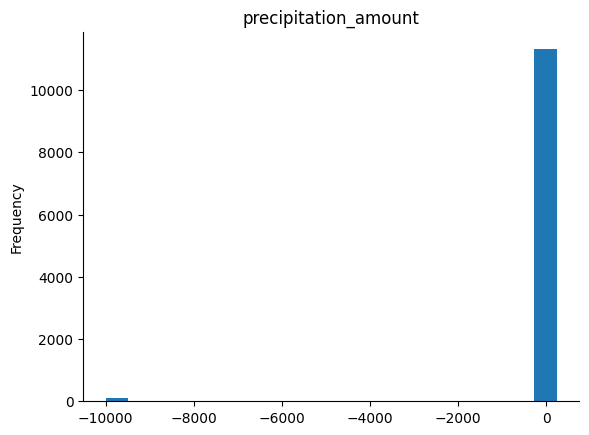

In [59]:
from matplotlib import pyplot as plt
SatellitePrecip_SanJuan_upd['precipitation_amount'].plot(kind='hist', bins=20, title='precipitation_amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [60]:
## ETL Join previous joined data with Satellite Precipitation data

In [61]:
Iquitos_Training_population_station_satellite = pd.merge(Iquitos_Training_population_station, SatellitePrecip_Iquitos_upd,  how='left', left_on=['year','month', 'day'], right_on = ['Year',' Month', ' Day'])

print(Iquitos_Training_population_station_satellite.shape)

print(Iquitos_Training_population_station_satellite.shape)

Iquitos_Training_population_station_satellite.head()

(468, 26)
(468, 26)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases,year,...,DD,TMAX,TMIN,TAVG,TDTR,PRCP,Year_y,Month,Day,precipitation_amount
0,2000/2001,1,2000-07-01,0,0,0,0,0,0,2000,...,1.0,34.0,-9999.0,-9999.0,-9999.0,-9999.0,2000,7,1,8.73
1,2000/2001,2,2000-07-08,0,0,0,0,0,0,2000,...,8.0,32.0,21.2,26.6,10.8,0.0,2000,7,8,1.02
2,2000/2001,3,2000-07-15,0,0,0,0,0,0,2000,...,15.0,-9999.0,14.7,-9999.0,-9999.0,-9999.0,2000,7,15,0
3,2000/2001,4,2000-07-22,0,0,0,0,0,0,2000,...,22.0,-9999.0,-9999.0,-9999.0,-9999.0,1.0,2000,7,22,0
4,2000/2001,5,2000-07-29,0,0,0,0,0,0,2000,...,29.0,31.0,21.5,26.2,9.5,-9999.0,2000,7,29,7.72


In [62]:
San_Juan_Training_population_station_satellite = pd.merge(San_Juan_Training_population_station, SatellitePrecip_SanJuan_upd,  how='left', left_on=['year','month', 'day'], right_on = ['Year',' Month', ' Day'])

print(San_Juan_Training_population_station_satellite.shape)

print(San_Juan_Training_population_station_satellite.shape)

San_Juan_Training_population_station_satellite.head()

(988, 27)
(988, 27)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases,...,DD,TMAX,TMIN,TAVG,TDTR,PRCP,Year_y,Month,Day,precipitation_amount
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4,...,30,29.4,22.2,25.8,7.2,0.0,1990,4,30,0
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5,...,7,31.7,23.9,27.8,7.8,0.0,1990,5,7,11.74
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4,...,14,29.4,22.8,26.1,6.6,4.1,1990,5,14,0
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3,...,21,33.3,24.4,28.8,8.9,0.0,1990,5,21,0
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6,...,28,33.9,25.0,29.5,8.9,0.0,1990,5,28,7.52


In [87]:

## 5 reanalysis

Reanalysis_Iquitos_url = "https://dengueforecasting.noaa.gov/Reanalysis/Iquitos.xlsx"

Reanalysis_SanJuan_url = "https://dengueforecasting.noaa.gov/Reanalysis/SanJuan.xlsx"


In [64]:
def multiple_excels(url, filename_1, filename_2, filename_3):

  #df = pd.read_csv(url)

  ##url = 'https://fred.stlouisfed.org/graph/fredgraph.xls?id=CHXRSA'

  # url = url

  request_data = requests.get(url)

  open('temp.xls', 'wb').write(request_data.content)

  df1 = pd.read_excel('temp.xls', filename_1)

  df2 = pd.read_excel('temp.xls', filename_2)

  df3 = pd.read_excel('temp.xls', filename_3)

  print('dataframe shape')

  print(df1.shape)
  print(df2.shape)
  print(df3.shape)

  print('dataframe columns')

  print(df1.columns)
  print(df2.columns)
  print(df3.columns)

  df1.to_csv((f"{filename_1}.csv"))
  df2.to_csv((f"{filename_2}.csv"))
  df3.to_csv((f"{filename_3}.csv"))

  return (df1, df2, df3)

In [89]:
(Reanalysis_SanJuan_file1, Reanalysis_SanJuan_file2, Reanalysis_SanJuan_file3) = multiple_excels(Reanalysis_SanJuan_url, 'ReanalysisHumidity', 'ReanalysisTemp', 'SatellitePrecip')

dataframe shape
(13255, 8)
(13260, 8)
(11409, 5)
dataframe columns
Index(['san_juan', ' 18.5N', ' 66W', ' air_temperature',
       ' dew_point_temperature', 'relative_humidity', ' specific_humidity',
       'Unnamed: 7'],
      dtype='object')
Index(['san_juan', ' 18.5N', ' 66W', ' minimum_air_temperature',
       ' maximum_air_temperature', 'precipitation_amount', 'TDTR', 'TAVG'],
      dtype='object')
Index(['san_juan_persiann', ' 18.375N', ' 66.125W', ' precipitation_amount',
       'Unnamed: 4'],
      dtype='object')


In [100]:
(Reanalysis_Iquitos_file1, Reanalysis_Iquitos_file2, Reanalysis_Iquitos_file3) = multiple_excels(Reanalysis_Iquitos_url, 'ReanalysisHumidity', 'RanalysisTemp', 'SatellitePrecip')

Reanalysis_Iquitos_file1.columns = ['Year', 'Month', 'Day', ' air_temperature', ' dew_point_temperature', 'relative_humidity', ' specific_humidity', 'Unnamed: 7']

Reanalysis_Iquitos_file2.columns = ['Year', 'Month', 'Day', ' minimum_air_temperature', ' maximum_air_temperature', 'precipitation_amount', 'TDTR', 'TAVG']

Reanalysis_Iquitos_file3.columns = ['Year', 'Month', 'Day', ' precipitation_amount', 'Unnamed: 4']

Reanalysis_Iquitos_file1_2 = pd.merge(Reanalysis_Iquitos_file1, Reanalysis_Iquitos_file2,  how='left', left_on=['Year', 'Month', 'Day'], right_on = ['Year', 'Month', 'Day'])

Reanalysis_Iquitos_file1_2_3 = pd.merge(Reanalysis_Iquitos_file1_2, Reanalysis_Iquitos_file3,  how='left', left_on=['Year', 'Month', 'Day'], right_on = ['Year', 'Month', 'Day'])

Reanalysis_Iquitos_file_upd = Reanalysis_Iquitos_file1_2_3[['Year', 'Month', 'Day', ' air_temperature', ' dew_point_temperature','relative_humidity', ' specific_humidity',' minimum_air_temperature', ' maximum_air_temperature', 'precipitation_amount', 'TDTR', 'TAVG']]

Reanalysis_Iquitos_file_upd.columns = 'Reanalysis_' + Reanalysis_Iquitos_file_upd.columns

Reanalysis_Iquitos_file_upd.head()

dataframe shape
(13255, 8)
(13260, 8)
(11409, 5)
dataframe columns
Index(['iquitos', ' 4S', ' 73W', ' air_temperature', ' dew_point_temperature',
       'relative_humidity', ' specific_humidity', 'Unnamed: 7'],
      dtype='object')
Index(['iquitos', ' 4S', ' 73W', ' minimum_air_temperature',
       ' maximum_air_temperature', 'precipitation_amount', 'TDTR', 'TAVG'],
      dtype='object')
Index(['iquitos_persiann', ' 3.875S', ' 73.375W', ' precipitation_amount',
       'Unnamed: 4'],
      dtype='object')


,Reanalysis_Year,Reanalysis_Month,Reanalysis_Day,Reanalysis_ air_temperature,Reanalysis_ dew_point_temperature,Reanalysis_relative_humidity,Reanalysis_ specific_humidity,Reanalysis_ minimum_air_temperature,Reanalysis_ maximum_air_temperature,Reanalysis_precipitation_amount,Reanalysis_TDTR,Reanalysis_TAVG
0,Year,Month,Day,K,K,%,g kg-1,K,K,kg m-2,K,K
1,1979,1,1,297.56,295.89,91.35,17.45,293.6,305.5,3.2,11.9,299.55
2,1979,1,2,297.78,296.96,95.52,18.65,295.2,303.6,12.3,8.4,299.4
3,1979,1,3,297.3,296.93,97.82,18.55,295.4,302.4,12.7,7,298.9
4,1979,1,4,297.36,295.78,91.98,17.31,293.2,300.4,3.7,7.2,296.8


In [95]:
(Reanalysis_SanJuan_file1, Reanalysis_SanJuan_file2, Reanalysis_SanJuan_file3) = multiple_excels(Reanalysis_SanJuan_url, 'ReanalysisHumidity', 'ReanalysisTemp', 'SatellitePrecip')

Reanalysis_SanJuan_file1.columns = ['Year', 'Month', 'Day', ' air_temperature', ' dew_point_temperature', 'relative_humidity', ' specific_humidity', 'Unnamed: 7']

Reanalysis_SanJuan_file2.columns = ['Year', 'Month', 'Day', ' minimum_air_temperature', ' maximum_air_temperature', 'precipitation_amount', 'TDTR', 'TAVG']

Reanalysis_SanJuan_file3.columns = ['Year', 'Month', 'Day', ' precipitation_amount', 'Unnamed: 4']

Reanalysis_SanJuan_file1_2 = pd.merge(Reanalysis_SanJuan_file1, Reanalysis_SanJuan_file2,  how='left', left_on=['Year', 'Month', 'Day'], right_on = ['Year', 'Month', 'Day'])

Reanalysis_SanJuan_file1_2_3 = pd.merge(Reanalysis_SanJuan_file1_2, Reanalysis_SanJuan_file3,  how='left', left_on=['Year', 'Month', 'Day'], right_on = ['Year', 'Month', 'Day'])

Reanalysis_SanJuan_file_upd = Reanalysis_SanJuan_file1_2_3[['Year', 'Month', 'Day', ' air_temperature', ' dew_point_temperature','relative_humidity', ' specific_humidity',' minimum_air_temperature', ' maximum_air_temperature', 'precipitation_amount', 'TDTR', 'TAVG']]

Reanalysis_SanJuan_file_upd.columns = 'Reanalysis_' + Reanalysis_SanJuan_file_upd.columns

Reanalysis_SanJuan_file_upd.head()

dataframe shape
(13255, 8)
(13260, 8)
(11409, 5)
dataframe columns
Index(['san_juan', ' 18.5N', ' 66W', ' air_temperature',
       ' dew_point_temperature', 'relative_humidity', ' specific_humidity',
       'Unnamed: 7'],
      dtype='object')
Index(['san_juan', ' 18.5N', ' 66W', ' minimum_air_temperature',
       ' maximum_air_temperature', 'precipitation_amount', 'TDTR', 'TAVG'],
      dtype='object')
Index(['san_juan_persiann', ' 18.375N', ' 66.125W', ' precipitation_amount',
       'Unnamed: 4'],
      dtype='object')


,Reanalysis_Year,Reanalysis_Month,Reanalysis_Day,Reanalysis_ air_temperature,Reanalysis_ dew_point_temperature,Reanalysis_relative_humidity,Reanalysis_ specific_humidity,Reanalysis_ minimum_air_temperature,Reanalysis_ maximum_air_temperature,Reanalysis_precipitation_amount,Reanalysis_TDTR,Reanalysis_TAVG
0,Year,Month,Day,K,K,%,g kg-1,K,K,kg m-2,K,K
1,1979,1,1,296.65,292.7,78.75,14.17,296.1,298,3.2,1.9,297.05
2,1979,1,2,296.55,291.38,72.93,13.03,295.7,297.6,0.6,1.9,296.65
3,1979,1,3,296.34,290.67,70.35,12.41,295.6,297,1,1.4,296.3
4,1979,1,4,296.14,291.08,73.47,12.81,295.2,296.9,2.7,1.7,296.05


In [97]:
Reanalysis_SanJuan_file_upd.columns

Index(['Reanalysis_Year', 'Reanalysis_Month', 'Reanalysis_Day',
       'Reanalysis_ air_temperature', 'Reanalysis_ dew_point_temperature',
       'Reanalysis_relative_humidity', 'Reanalysis_ specific_humidity',
       'Reanalysis_ minimum_air_temperature',
       'Reanalysis_ maximum_air_temperature',
       'Reanalysis_precipitation_amount', 'Reanalysis_TDTR',
       'Reanalysis_TAVG'],
      dtype='object')

In [101]:
Reanalysis_Iquitos_file_upd.columns

Index(['Reanalysis_Year', 'Reanalysis_Month', 'Reanalysis_Day',
       'Reanalysis_ air_temperature', 'Reanalysis_ dew_point_temperature',
       'Reanalysis_relative_humidity', 'Reanalysis_ specific_humidity',
       'Reanalysis_ minimum_air_temperature',
       'Reanalysis_ maximum_air_temperature',
       'Reanalysis_precipitation_amount', 'Reanalysis_TDTR',
       'Reanalysis_TAVG'],
      dtype='object')

In [ ]:
# ETL 4

In [102]:
Iquitos_Training_population_station_satellite_Reanalysis = pd.merge(Iquitos_Training_population_station_satellite, Reanalysis_Iquitos_file_upd,  how='left', left_on=['year','month', 'day'], right_on = ['Reanalysis_Year','Reanalysis_Month', 'Reanalysis_Day'])

print(Iquitos_Training_population_station_satellite_Reanalysis.shape)

print(Iquitos_Training_population_station_satellite_Reanalysis.shape)

Iquitos_Training_population_station_satellite_Reanalysis.head()

(468, 38)
(468, 38)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases,year,...,Reanalysis_Day,Reanalysis_ air_temperature,Reanalysis_ dew_point_temperature,Reanalysis_relative_humidity,Reanalysis_ specific_humidity,Reanalysis_ minimum_air_temperature,Reanalysis_ maximum_air_temperature,Reanalysis_precipitation_amount,Reanalysis_TDTR,Reanalysis_TAVG
0,2000/2001,1,2000-07-01,0,0,0,0,0,0,2000,...,1,296.74,295.77,94.92,17.3,294.6,301.5,6.3,6.9,298.05
1,2000/2001,2,2000-07-08,0,0,0,0,0,0,2000,...,8,295.92,295.3,96.62,16.87,293,302.6,11.2,9.6,297.8
2,2000/2001,3,2000-07-15,0,0,0,0,0,0,2000,...,15,295.39,290.6,75.68,12.45,291,301.2,0,10.2,296.1
3,2000/2001,4,2000-07-22,0,0,0,0,0,0,2000,...,22,296.3,293.77,88,15.3,292.8,302.9,1.7,10.1,297.85
4,2000/2001,5,2000-07-29,0,0,0,0,0,0,2000,...,29,298.85,291.53,65.25,13.25,291.1,305.5,0,14.4,298.3


In [110]:
Iquitos_Training_population_station_satellite_Reanalysis['week_number']= Iquitos_Training_population_station_satellite_Reanalysis['week_start_date'].dt.isocalendar().week

In [109]:
San_Juan_Training_population_station_satellite_Reanalysis = pd.merge(San_Juan_Training_population_station_satellite, Reanalysis_SanJuan_file_upd,  how='left', left_on=['year','month', 'day'], right_on = ['Reanalysis_Year','Reanalysis_Month', 'Reanalysis_Day'])

print(San_Juan_Training_population_station_satellite_Reanalysis.shape)

print(San_Juan_Training_population_station_satellite_Reanalysis.shape)

San_Juan_Training_population_station_satellite_Reanalysis.head()

(988, 39)
(988, 39)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases,...,Reanalysis_Day,Reanalysis_ air_temperature,Reanalysis_ dew_point_temperature,Reanalysis_relative_humidity,Reanalysis_ specific_humidity,Reanalysis_ minimum_air_temperature,Reanalysis_ maximum_air_temperature,Reanalysis_precipitation_amount,Reanalysis_TDTR,Reanalysis_TAVG
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4,...,30,298.01,291.67,67.95,13.32,297,299.7,0.1,2.7,298.35
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5,...,7,299.02,295.65,81.75,17.08,298.3,300.9,1.4,2.6,299.6
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4,...,14,298.44,294.38,78.47,15.76,297.3,300.3,4.6,3,298.8
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3,...,21,299.73,296.18,81.15,17.56,298.5,301.4,0,2.9,299.95
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6,...,28,299.51,296.9,85.65,18.39,298.6,301,4.9,2.4,299.8


In [112]:
San_Juan_Training_population_station_satellite_Reanalysis['week_number']= San_Juan_Training_population_station_satellite_Reanalysis['week_start_date'].dt.isocalendar().week

In [123]:

## 6 NDVI

NDVI_iquitos_url = "https://dengueforecasting.noaa.gov/NDVI/iquitos_noqc.csv"

NDVI_sanJuan_url = "https://dengueforecasting.noaa.gov/NDVI/sanJuan_noqc.csv"


In [105]:
NDVI_iquitos = get_files(NDVI_iquitos_url, 'NDVI_iquitos')##1

dataframe shape
(1691, 6)
dataframe columns
Index(['Year', ' Week', ' [-3.750892162323 -73.2434844970703]',
       ' [-3.750892162323 -73.2934875488281]',
       ' [-3.70089221000671 -73.2434844970703]',
       ' [-3.80089211463928 -73.2434844970703]'],
      dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Year                                    1691 non-null   int64 
 1    Week                                   1691 non-null   int64 
 2    [-3.750892162323 -73.2434844970703]    1691 non-null   object
 3    [-3.750892162323 -73.2934875488281]    1691 non-null   object
 4    [-3.70089221000671 -73.2434844970703]  1691 non-null   object
 5    [-3.80089211463928 -73.2434844970703]  1691 non-null   object
dtypes: int64(2), object(4)
memory usage: 79.4+ KB


In [107]:
NDVI_iquitos.head()

,Year,Week,[-3.750892162323 -73.2434844970703],[-3.750892162323 -73.2934875488281],[-3.70089221000671 -73.2434844970703],[-3.80089211463928 -73.2434844970703]
0,1981,26,2.012750e-01,2.296000e-01,2.071000e-01,2.533000e-01
1,1981,27,1.820667e-01,1.344667e-01,1.557000e-01,2.174667e-01
2,1981,28,3.673667e-01,2.194000e-01,2.948167e-01,3.173000e-01
3,1981,29,3.789000e-01,3.017571e-01,2.209429e-01,3.856167e-01
4,1981,30,3.455714e-01,3.648143e-01,1.978571e-01,3.246429e-01


In [115]:
NDVI_iquitos.columns

Index(['Year', ' Week', ' [-3.750892162323 -73.2434844970703]',
       ' [-3.750892162323 -73.2934875488281]',
       ' [-3.70089221000671 -73.2434844970703]',
       ' [-3.80089211463928 -73.2434844970703]'],
      dtype='object')

In [136]:
NDVI_iquitos.columns = ['Year', ' Week', 'ndvi_se', ' ndvi_sw', 'ndvi_ne', 'ndvi_nw']

In [125]:
NDVI_sanJuan = get_files(NDVI_sanJuan_url, 'NDVI_sanJuan')##1

dataframe shape
(1691, 6)
dataframe columns
Index(['Year', ' Week', ' [18.4491119384766 -66.0930480957031]',
       ' [18.4991111755371 -66.0930480957031]',
       ' [18.4491119384766 -66.1430511474609]',
       ' [18.4991111755371 -66.1430511474609]'],
      dtype='object')
dataframe rows details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Year                                   1691 non-null   int64 
 1    Week                                  1691 non-null   int64 
 2    [18.4491119384766 -66.0930480957031]  1691 non-null   object
 3    [18.4991111755371 -66.0930480957031]  1691 non-null   object
 4    [18.4491119384766 -66.1430511474609]  1691 non-null   object
 5    [18.4991111755371 -66.1430511474609]  1691 non-null   object
dtypes: int64(2), object(4)
memory usage: 79.4+ KB
None
dat

In [137]:
NDVI_sanJuan.columns = ['Year', ' Week', 'ndvi_se', ' ndvi_sw', 'ndvi_ne', 'ndvi_nw']

In [120]:
NDVI_sanJuan.head()

,Year,Week,[18.4491119384766 -66.0930480957031],[18.4991111755371 -66.0930480957031],[18.4491119384766 -66.1430511474609],[18.4991111755371 -66.1430511474609]
0,1981,26,2.846000e-01,2.102000e-01,2.630000e-01,1.064000e-01
1,1981,27,2.916286e-01,NaN,3.082286e-01,3.198250e-01
2,1981,28,2.938167e-01,1.203000e-01,3.079333e-01,NaN
3,1981,29,2.415000e-01,1.230000e-01,2.034333e-01,2.647667e-01
4,1981,30,2.127167e-01,3.114000e-01,2.284500e-01,2.332500e-01


In [ ]:
# ETL 5

In [138]:
Iquitos_Training_population_station_satellite_Reanalysis_NDVI = pd.merge(Iquitos_Training_population_station_satellite_Reanalysis, NDVI_iquitos,  how='left', left_on=['year','week_number'], right_on = ['Year',' Week'])

print(Iquitos_Training_population_station_satellite_Reanalysis_NDVI.shape)

print(Iquitos_Training_population_station_satellite_Reanalysis.shape)

Iquitos_Training_population_station_satellite_Reanalysis_NDVI.head()

(468, 45)
(468, 39)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,total_cases,year,...,Reanalysis_precipitation_amount,Reanalysis_TDTR,Reanalysis_TAVG,week_number,Year,Week,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
0,2000/2001,1,2000-07-01,0,0,0,0,0,0,2000,...,6.3,6.9,298.05,26,2000.0,26.0,1.928857e-01,2.472000e-01,1.322571e-01,3.408857e-01
1,2000/2001,2,2000-07-08,0,0,0,0,0,0,2000,...,11.2,9.6,297.8,27,2000.0,27.0,2.168333e-01,2.416571e-01,2.761000e-01,2.894571e-01
2,2000/2001,3,2000-07-15,0,0,0,0,0,0,2000,...,0,10.2,296.1,28,2000.0,28.0,1.767571e-01,1.280143e-01,1.731286e-01,2.041143e-01
3,2000/2001,4,2000-07-22,0,0,0,0,0,0,2000,...,1.7,10.1,297.85,29,2000.0,29.0,2.277286e-01,2.003143e-01,1.454286e-01,2.542000e-01
4,2000/2001,5,2000-07-29,0,0,0,0,0,0,2000,...,0,14.4,298.3,30,2000.0,30.0,3.286429e-01,3.610429e-01,3.221286e-01,2.543714e-01


In [139]:
Iquitos_Training_population_station_satellite_Reanalysis_NDVI.columns

Index(['season', 'season_week', 'week_start_date', 'denv1_cases',
       'denv2_cases', 'denv3_cases', 'denv4_cases', 'other_positive_cases',
       'total_cases', 'year', 'month', 'day', 'Year_x', 'Estimated_population',
       'YYYY', 'MM', 'DD', 'TMAX', 'TMIN', 'TAVG', 'TDTR', 'PRCP', 'Year_y',
       ' Month', ' Day', 'precipitation_amount', 'Reanalysis_Year',
       'Reanalysis_Month', 'Reanalysis_Day', 'Reanalysis_ air_temperature',
       'Reanalysis_ dew_point_temperature', 'Reanalysis_relative_humidity',
       'Reanalysis_ specific_humidity', 'Reanalysis_ minimum_air_temperature',
       'Reanalysis_ maximum_air_temperature',
       'Reanalysis_precipitation_amount', 'Reanalysis_TDTR', 'Reanalysis_TAVG',
       'week_number', 'Year', ' Week', 'ndvi_se', ' ndvi_sw', 'ndvi_ne',
       'ndvi_nw'],
      dtype='object')

In [140]:
San_Juan_Training_population_station_satellite_Reanalysis_NDVI = pd.merge(San_Juan_Training_population_station_satellite_Reanalysis, NDVI_sanJuan, how='left', left_on=['year','week_number'], right_on = ['Year',' Week'])

print(San_Juan_Training_population_station_satellite_Reanalysis_NDVI.shape)

print(San_Juan_Training_population_station_satellite_Reanalysis.shape)

San_Juan_Training_population_station_satellite_Reanalysis_NDVI.head()

(988, 46)
(988, 40)


,season,season_week,week_start_date,denv1_cases,denv2_cases,denv3_cases,denv4_cases,other_positive_cases,additional_cases,total_cases,...,Reanalysis_precipitation_amount,Reanalysis_TDTR,Reanalysis_TAVG,week_number,Year,Week,ndvi_se,ndvi_sw,ndvi_ne,ndvi_nw
0,1990/1991,1,1990-04-30,0,0,0,0,4,0,4,...,0.1,2.7,298.35,18,1990.0,18.0,1.984833e-01,1.226000e-01,1.776167e-01,1.037250e-01
1,1990/1991,2,1990-05-07,0,0,0,0,5,0,5,...,1.4,2.6,299.6,19,1990.0,19.0,1.623571e-01,1.699000e-01,1.554857e-01,1.421750e-01
2,1990/1991,3,1990-05-14,0,0,0,0,4,0,4,...,4.6,3,298.8,20,1990.0,20.0,1.572000e-01,3.225000e-02,1.708429e-01,1.729667e-01
3,1990/1991,4,1990-05-21,0,0,0,0,3,0,3,...,0,2.9,299.95,21,1990.0,21.0,2.275571e-01,1.286333e-01,2.358857e-01,2.450667e-01
4,1990/1991,5,1990-05-28,0,0,0,0,6,0,6,...,4.9,2.4,299.8,22,1990.0,22.0,2.512000e-01,1.962000e-01,2.473400e-01,2.622000e-01


In [141]:
San_Juan_Training_population_station_satellite_Reanalysis_NDVI.columns

Index(['season', 'season_week', 'week_start_date', 'denv1_cases',
       'denv2_cases', 'denv3_cases', 'denv4_cases', 'other_positive_cases',
       'additional_cases', 'total_cases', 'year', 'month', 'day', 'Year_x',
       'Estimated_population', 'YYYY', 'MM', 'DD', 'TMAX', 'TMIN', 'TAVG',
       'TDTR', 'PRCP', 'Year_y', ' Month', ' Day', 'precipitation_amount',
       'Reanalysis_Year', 'Reanalysis_Month', 'Reanalysis_Day',
       'Reanalysis_ air_temperature', 'Reanalysis_ dew_point_temperature',
       'Reanalysis_relative_humidity', 'Reanalysis_ specific_humidity',
       'Reanalysis_ minimum_air_temperature',
       'Reanalysis_ maximum_air_temperature',
       'Reanalysis_precipitation_amount', 'Reanalysis_TDTR', 'Reanalysis_TAVG',
       'week_number', 'Year', ' Week', 'ndvi_se', ' ndvi_sw', 'ndvi_ne',
       'ndvi_nw'],
      dtype='object')

In [142]:
San_Juan_Training_population_station_satellite_Reanalysis_sub = San_Juan_Training_population_station_satellite_Reanalysis_NDVI[['season_week', 'week_start_date', 'denv1_cases','denv2_cases', 'denv3_cases', 'denv4_cases', 'other_positive_cases', 'additional_cases', 'total_cases', 'year', 'month', 'day',
                                                                                                                                'TMAX', 'TMIN', 'TAVG', 'TDTR', 'PRCP', 'precipitation_amount', 'Reanalysis_Year', 'Reanalysis_Month', 'Reanalysis_Day', 'Reanalysis_ air_temperature',
                                                                                                                                'Reanalysis_ dew_point_temperature', 'Reanalysis_relative_humidity', 'Reanalysis_ specific_humidity', 'Reanalysis_ minimum_air_temperature',
                                                                                                                                'Reanalysis_ maximum_air_temperature', 'Reanalysis_precipitation_amount', 'Reanalysis_TDTR', 'Reanalysis_TAVG', 'week_number', ' Week', 'ndvi_se', ' ndvi_sw', 'ndvi_ne', 'ndvi_nw']]

In [143]:
Iquitos_Training_population_station_satellite_Reanalysis_sub = Iquitos_Training_population_station_satellite_Reanalysis_NDVI[['season_week', 'week_start_date', 'denv1_cases','denv2_cases', 'denv3_cases', 'denv4_cases', 'other_positive_cases', 'total_cases', 'year', 'month', 'day',
                                                                                                                                'TMAX', 'TMIN', 'TAVG', 'TDTR', 'PRCP', 'precipitation_amount', 'Reanalysis_Year', 'Reanalysis_Month', 'Reanalysis_Day', 'Reanalysis_ air_temperature',
                                                                                                                                'Reanalysis_ dew_point_temperature', 'Reanalysis_relative_humidity', 'Reanalysis_ specific_humidity', 'Reanalysis_ minimum_air_temperature',
                                                                                                                                'Reanalysis_ maximum_air_temperature', 'Reanalysis_precipitation_amount', 'Reanalysis_TDTR', 'Reanalysis_TAVG', 'week_number', ' Week', 'ndvi_se', ' ndvi_sw', 'ndvi_ne', 'ndvi_nw']]

In [144]:
filename = 'San_Juan_Training_population_station_satellite_Reanalysis_sub'

San_Juan_Training_population_station_satellite_Reanalysis_sub.to_csv((f"{filename}.csv"))

In [145]:
filename = 'Iquitos_Training_population_station_satellite_Reanalysis_sub'

Iquitos_Training_population_station_satellite_Reanalysis_sub.to_csv((f"{filename}.csv"))

In [146]:
ls -ltr

total 8161
drwx------ 2 root root    4096 Feb 25 16:53  backup_data/
-rw------- 1 root root  662244 Feb 25 19:50 'StationData_Iquitos).csv'
-rw------- 1 root root  561391 Feb 27 16:25  Reanalysis_SanJuan.csv
-rw------- 1 root root  561275 Feb 28 17:24  Reanalysis_Iquitos.csv
-rw------- 1 root root   43000 Feb 29 16:26  San_Juan_Training_Data.csv
-rw------- 1 root root   18847 Feb 29 16:26  StationData_Iquitos_Training_Data.csv
-rw------- 1 root root     289 Feb 29 16:26  San_Juan_Population_Data.csv
-rw------- 1 root root     242 Feb 29 16:26  Iquitos_Population_Data.csv
-rw------- 1 root root  662244 Feb 29 16:26  StationData_Iquitos.csv
-rw------- 1 root root  834637 Feb 29 16:26  StationData_SanJuan.csv
-rw------- 1 root root  223097 Feb 29 16:26  SatellitePrecip_Iquitos.csv
-rw------- 1 root root  209360 Feb 29 16:26  SatellitePrecip_SanJuan.csv
-rw------- 1 root root  721938 Feb 29 19:38  ReanalysisTemp.csv
-rw------- 1 root root 1679747 Feb 29 19:46  temp.xls
-rw------- 1 root ro